This data set contains 40 years of Energy use and CO2 emission data from approximately 250 countries. We aim to answer the following questions:

Questions we aim to answer:
1. Are CO2 emissions increasing or decreasing on a global scale and what is causing that change?
2. What are contributing factors to countries who are increasing their CO2 emissions?
3. What are contributing factors to countries who are decreasing their CO2 emissions?
4. Does GDP (Gross Domestic Product) or population correlate to CO2 emissions?


In [119]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
import seaborn as sns


df = pd.read_csv('energy_cleaned.csv')
df.drop(columns='Unnamed: 0',inplace=True)
df

,Country,Energy_type,Year,Energy_consumption,Energy_production,GDP,Population,CO2_emission,Energy_intensity_per_capita,Energy_intensity_per_GDP
0,Argentina,all_energy_types,1980,1.713088,1.597946,453.8190,27951.93,0.000000,61.286935,3.774827
1,Argentina,coal,1980,0.034096,0.008735,453.8190,27951.93,0.000000,1.219805,0.075131
2,Argentina,natural_gas,1980,0.368334,0.287280,453.8190,27951.93,0.000000,13.177409,0.811632
3,Argentina,nuclear,1980,0.025889,0.025889,453.8190,27951.93,0.000000,0.926199,0.057047
4,Argentina,petroleum_n_other_liquids,1980,1.102052,1.095156,453.8190,27951.93,0.000000,39.426682,2.428395
...,...,...,...,...,...,...,...,...,...,...
40021,Zimbabwe,coal,2019,0.045064,0.075963,37.6204,14654.20,4.586869,3.075137,1.197852
40022,Zimbabwe,natural_gas,2019,0.000000,0.000000,37.6204,14654.20,0.000000,0.000000,0.000000
40023,Zimbabwe,nuclear,2019,0.000000,0.000000,37.6204,14654.20,0.000000,0.000000,0.000000
40024,Zimbabwe,petroleum_n_other_liquids,2019,0.055498,0.000000,37.6204,14654.20,4.377890,3.787169,1.475209


[Text(0.5, 1.0, 'Global CO2 emissions')]

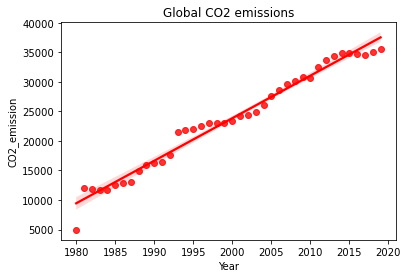

In [141]:
df1= df.loc[df['Energy_type'] == 'all_energy_types']
world = df1[df1.Country == 'World' ]
sns.regplot(world['Year'],world['CO2_emission'], color = 'red').set(title='Global CO2 emissions')

We see that CO2 emissions are steadily trending upwards.

[Text(0.5, 1.0, 'Global energy consumption')]

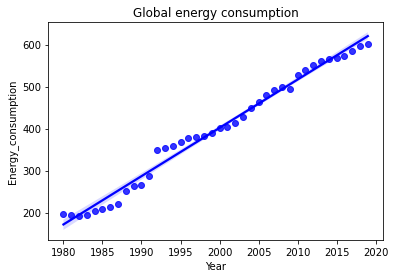

In [143]:
sns.regplot(world['Year'],world['Energy_consumption'], color = 'blue').set(title='Global energy consumption')

And the graph for energy consumption looks almost identical suggesting that an increased demand for energy has also meant an increase in CO2 emissions.

Lets start with a deeper look at the global CO2 emissions divided by global energy production.

[Text(0.5, 1.0, 'Global CO2 emissions per unit of energy produced')]

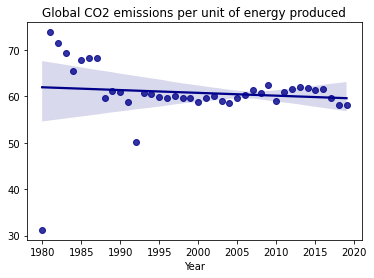

In [136]:

sns.regplot(world['Year'],(world['CO2_emission']/world['Energy_production']), color = 'darkblue').set(title='Global CO2 emissions per unit of energy produced')


Here we see a slight downward trend in the data suggesting that per unit of power produced, we may be emitting slightly less CO2. 

Lets take a look to see if we can determine if that is from a growth in renewable energy sources, a switch to a cleaner but still polluting energy source (coal -> natural gas for example) or if technological improvements have made emittors more efficient.

We will begin by viewing the growth of renewable energy production in comparison to the total energy production.

Text(0.5, 1.0, 'Percentage of energy coming from clean sources')

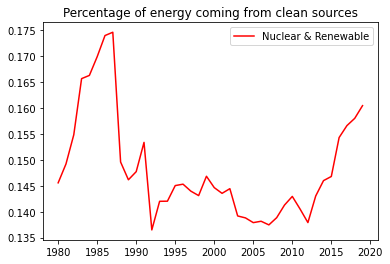

In [121]:
df0 = df.loc[df.Country == 'World' ]
df1 = df0.loc[df0['Energy_type'] == 'nuclear' ]
df2 = df0.loc[df0['Energy_type'] == 'renewables_n_other']
df3 = df0.loc[df0['Energy_type'] == 'all_energy_types']

df6 = pd.concat([df1,df2,df3], ignore_index=True)
df4= pd.concat([df1,df2,df3], ignore_index=True)
df4.drop(columns=['Energy_consumption','GDP','Population','CO2_emission', 'Energy_intensity_per_capita' , 'Energy_intensity_per_GDP'],inplace=True)

df5 = df4.pivot(index ='Year', columns='Energy_type', values='Energy_production')

df5.insert(3, 'total_no_CO2', (df5['nuclear'] + df5['renewables_n_other']))
df5.drop(columns=['nuclear', 'renewables_n_other'],inplace=True)
df5.reset_index(drop=True, inplace=True)

df5.insert(0, 'Year','')

x = 1980
for i in range(len(df5)):
    df5['Year'].values[i] = x
    x +=1
    if x == 2020:
        x = 1980


#sns.regplot(df5['Year'],(df5['total_no_CO2'] / df5['all_energy_types']), color = 'red',fit_reg = True)
plt.plot(df5['Year'], (df5['total_no_CO2'] / df5['all_energy_types']),'red', label = 'Nuclear & Renewable')
plt.legend()
plt.title ('Percentage of energy coming from clean sources')


Globally, there doesn't appear to be a large trend in the transition to energy sources that produce no CO2 (nuclear and renewables) as these are still within 4% of each across the entire 40 years. And even looking at the last 20 years, nuclear and renewables have only changed about 1.5%. Lets check if the transition betweel coal, natural gas and petroleum has had any effect.

Text(0.5, 1.0, 'Global energy consumption by source')

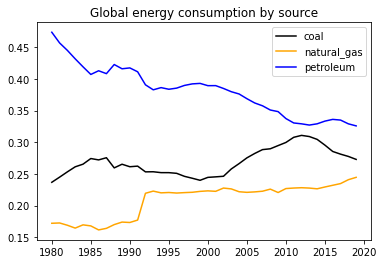

In [122]:
df0 = df.loc[df.Country == 'World' ]
df1 = df0.loc[df0['Energy_type'] == 'coal' ]
df2 = df0.loc[df0['Energy_type'] == 'petroleum_n_other_liquids']
df3 = df0.loc[df0['Energy_type'] == 'natural_gas']
df4 = df0.loc[df0['Energy_type'] == 'all_energy_types']
df5= pd.concat([df1,df2,df3,df4], ignore_index=True)

df5.drop(columns=['Energy_production','GDP','Population','CO2_emission', 'Energy_intensity_per_capita' , 'Energy_intensity_per_GDP'],inplace=True)
df6 = df5.pivot(index ='Year', columns='Energy_type', values='Energy_consumption')
df6.reset_index(drop=True, inplace=True)
df6.insert(0, 'Year','')

x = 1980
for i in range(len(df6)):
    df6['Year'].values[i] = x
    x +=1
    if x == 2020:
        x = 1980

plt.plot(df6['Year'], (df6['coal'] / df6['all_energy_types']),'black', label = 'coal')
plt.plot(df6['Year'], (df6['natural_gas'] / df6['all_energy_types']),'orange', label = 'natural_gas')
plt.plot(df6['Year'], (df6['petroleum_n_other_liquids'] / df6['all_energy_types']),'blue', label = 'petroleum')
plt.legend()
plt.title('Global energy consumption by source')


In terms of "dirty" energy, we can see a fairly substantial downtrend of about 15% in energy production from petroleum and other liquids, with that primarily being taken up by an increase of about 10% in natural gas, with the remainder from a small uptick in coal production. Natural gas emits about 50% less CO2 than coal, and 30% less CO2 than petroleum per unit of energy. The combination of natural gas (the most efficient energy source of these three), along with its increase in usage, would account for a large portion of the decrease in CO2 emissions.

Key Takeaway #1: The increased use of natural gas over coal and petroleum has contributed to a reduction in global CO2 emissions per unit of energy produced.

Lets transition into looking at some countries individually and see which countries have had the largest increase in CO2 emissions as well as the smallest increase in CO2 emissions. We will compare 1993 to 2019 CO2 emissions by individual country, as years before 1993 are missing CO2 emissions for many countries. Starting at 1993 gives us 191 countries to compare.

In [123]:
df0= df.loc[df['Energy_type'] == 'all_energy_types']
df1 = df0.loc[df0['Year'] == 1993]
df2 = df0.loc[df0['Year'] == 2019]


df3 = pd.concat([df1,df2], ignore_index=True)
df3.drop(columns=['Energy_type','Energy_consumption','Energy_production','GDP','Population','Energy_intensity_per_capita','Energy_intensity_per_GDP'],inplace=True)
df4 = df3.loc[df3['CO2_emission'] != 0 ]
df5 = df4.pivot(index ='Country', columns='Year', values='CO2_emission')
df5.insert(2, 'Total Change',(df5[2019]-df5[1993]))
df5.insert(3, '% Change',(df5['Total Change']/df5[1993]))
df6 = df5.sort_values(by = '% Change',ascending=False)
df6.head(5)


Year,1993,2019,Total Change,% Change
Country,,,,
Laos,0.320264,29.945309,29.625045,92.501838
Equatorial Guinea,0.100000,4.669232,4.569232,45.692318
Cambodia,0.500000,11.890896,11.390896,22.781792
Maldives,0.100000,2.036073,1.936073,19.360729
Vietnam,15.938822,241.806422,225.867600,14.170909


Here we see that the 5 countries with the highest increasing CO2 percentage of emissions during this time frame are Laos, Equitorial Guinea, Cambodia, Maldives, and Vietnam.

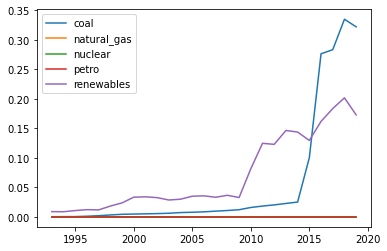

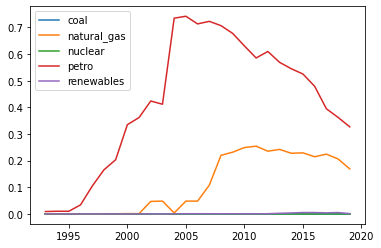

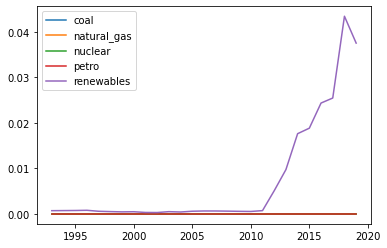

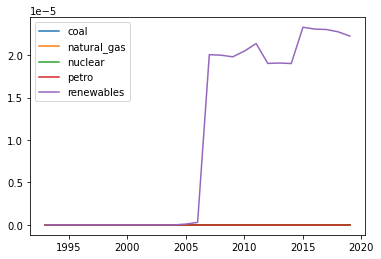

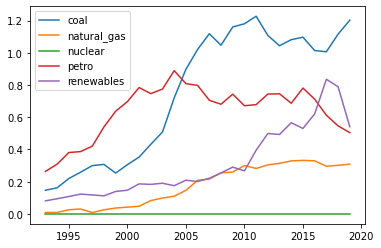

In [124]:
df0 = df.loc[df.Year >= 1993]
df1 = df0.loc[df.Country == 'Laos']
df2 = df0.loc[df.Country == 'Equatorial Guinea']
df3 = df0.loc[df.Country == 'Cambodia']
df4 = df0.loc[df.Country == 'Maldives']
df5 = df0.loc[df.Country == 'Vietnam']

a  = [df1,df2,df3,df4,df5]
b= 0

for i in a:
    coal = i.loc[i['Energy_type'] == 'coal' ]
    natural_gas = i.loc[i['Energy_type'] == 'natural_gas']
    nuclear = i.loc[i['Energy_type'] == 'nuclear']
    petro = i.loc[i['Energy_type'] == 'petroleum_n_other_liquids']
    renewables = i.loc[i['Energy_type'] == 'renewables_n_other']
    plt.figure(b)
    x1 = coal.Year
    y1 = coal.Energy_production
    x2 = natural_gas.Year
    y2 = natural_gas.Energy_production
    x3 = nuclear.Year
    y3 = nuclear.Energy_production
    x4 = petro.Year
    y4 = petro.Energy_production
    x5 = renewables.Year
    y5 = renewables.Energy_production
    plt.plot(x1,y1, label = 'coal')
    plt.plot(x2,y2, label = 'natural_gas')
    plt.plot(x3,y3, label = 'nuclear')
    plt.plot(x4,y4, label = 'petro')
    plt.plot(x5,y5, label = 'renewables')
    plt.legend()
    b+=1

Reviewing the graphs, it appears that the largest percentage increase in CO2 emissions comes primarily from countries who had very little energy production to begin with. Lets see if reviewing by total change can give us some better insights.

In [125]:
df0= df.loc[df['Energy_type'] == 'all_energy_types']
df1 = df0.loc[df0['Year'] == 1993]
df2 = df0.loc[df0['Year'] == 2019]


df3 = pd.concat([df1,df2], ignore_index=True)
df3.drop(columns=['Energy_type','Energy_consumption','Energy_production','GDP','Population','Energy_intensity_per_capita','Energy_intensity_per_GDP'],inplace=True)
df4 = df3.loc[df3['CO2_emission'] != 0 ]
df5 = df4.pivot(index ='Country', columns='Year', values='CO2_emission')
df5.insert(2, 'Total Change',(df5[2019]-df5[1993]))
df5.insert(3, '% Change',(df5['Total Change']/df5[1993]))
df_total_co2_change = df5.sort_values(by = 'Total Change',ascending=False)
df_total_co2_change.head(6)

Year,1993,2019,Total Change,% Change
Country,,,,
World,21482.951791,35557.447589,14074.495798,0.655147
China,2541.080385,10608.600386,8067.520002,3.174839
India,604.997766,2308.332020,1703.334254,2.815439
Iran,214.123017,642.964294,428.841277,2.002780
South Korea,310.348615,702.961082,392.612468,1.265069
Indonesia,171.564003,529.404673,357.840670,2.085756


Lets plot out China, India, Iran, South Korea and Indonesia and see what factors are driving their increased CO2 emissions.

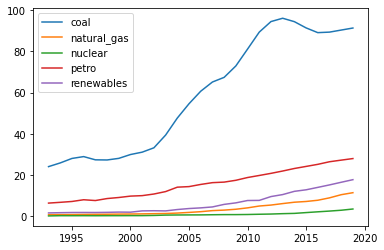

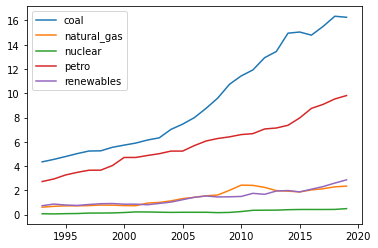

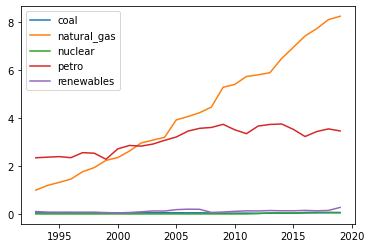

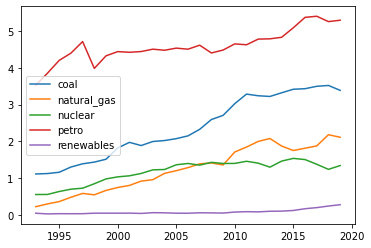

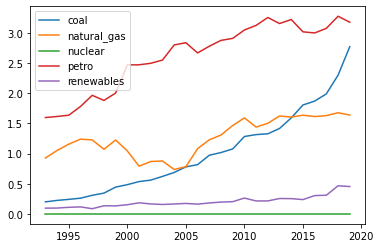

In [126]:
df0 = df.loc[df.Year >= 1993]
df1 = df0.loc[df.Country == 'China']
df2 = df0.loc[df.Country == 'India']
df3 = df0.loc[df.Country == 'Iran']
df4 = df0.loc[df.Country == 'South Korea']
df5 = df0.loc[df.Country == 'Indonesia']

a  = [df1,df2,df3,df4,df5]
b= 0

for i in a:
    coal = i.loc[i['Energy_type'] == 'coal' ]
    natural_gas = i.loc[i['Energy_type'] == 'natural_gas']
    nuclear = i.loc[i['Energy_type'] == 'nuclear']
    petro = i.loc[i['Energy_type'] == 'petroleum_n_other_liquids']
    renewables = i.loc[i['Energy_type'] == 'renewables_n_other']

    plt.figure(b)
    x1 = coal.Year
    y1 = coal.Energy_consumption
    x2 = natural_gas.Year
    y2 = natural_gas.Energy_consumption
    x3 = nuclear.Year
    y3 = nuclear.Energy_consumption
    x4 = petro.Year
    y4 = petro.Energy_consumption
    x5 = renewables.Year
    y5 = renewables.Energy_consumption
    plt.plot(x1,y1, label = 'coal')
    plt.plot(x2,y2, label = 'natural_gas')
    plt.plot(x3,y3, label = 'nuclear')
    plt.plot(x4,y4, label = 'petro')
    plt.plot(x5,y5, label = 'renewables')
    plt.legend()
    b+=1

All of these countries have significant increases in energy consumption, which would strongly correlate to CO2 emissions. Additionally it appears that there isn't one clear type of energy driving this change. Increases in all of the "dirty" types of energy are contributing to the increased CO2 emissions suggesting that other factors such as affordability and availability of resources in their local regions are much more strongly influencing their energy supply choices.

Key Takeaway #2: The increase in CO2 emissions isn't primarily driven by a certain type of energy. Rather, other factors come into play as different countries choose various types of energy sources to satisfy their energy demands.

Lets take a look at the countries with the largest total reductions in CO2 emissions.

In [127]:
df0= df.loc[df['Energy_type'] == 'all_energy_types']
df1 = df0.loc[df0['Year'] == 1993]
df2 = df0.loc[df0['Year'] == 2019]


df3 = pd.concat([df1,df2], ignore_index=True)
df3.drop(columns=['Energy_type','Energy_consumption','Energy_production','GDP','Population','Energy_intensity_per_capita','Energy_intensity_per_GDP'],inplace=True)
df4 = df3.loc[df3['CO2_emission'] != 0 ]
df5 = df4.pivot(index ='Country', columns='Year', values='CO2_emission')
df5.insert(2, 'Total Change',(df5[2019]-df5[1993]))
df5.insert(3, '% Change',(df5['Total Change']/df5[1993]))
df_total_co2_change = df5.sort_values(by = 'Total Change',ascending=True)
df_total_co2_change.head(5)

Year,1993,2019,Total Change,% Change
Country,,,,
Russia,2206.984323,1798.242239,-408.742085,-0.185204
Ukraine,594.182350,202.513341,-391.669009,-0.659173
United Kingdom,596.731568,411.167848,-185.563721,-0.310967
Germany,953.165273,781.596225,-171.569048,-0.179999
Kazakhstan,359.641181,269.713174,-89.928007,-0.250049


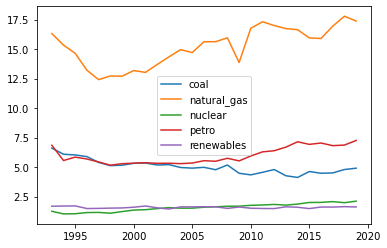

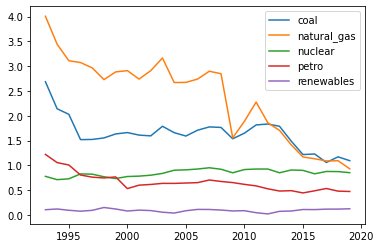

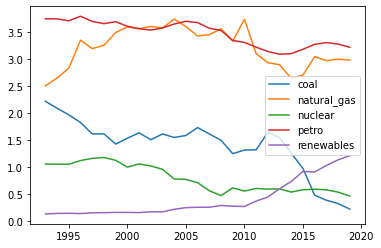

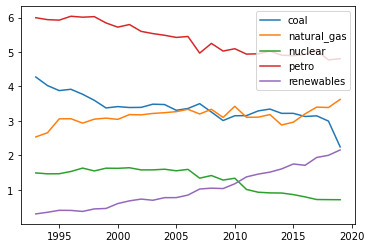

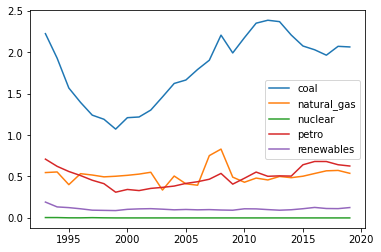

In [128]:
df0 = df.loc[df.Year >= 1993]
df1 = df0.loc[df.Country == 'Russia']
df2 = df0.loc[df.Country == 'Ukraine']
df3 = df0.loc[df.Country == 'United Kingdom']
df4 = df0.loc[df.Country == 'Germany']
df5 = df0.loc[df.Country == 'Kazakhstan']

a  = [df1,df2,df3,df4,df5]
b= 0

for i in a:
    coal = i.loc[i['Energy_type'] == 'coal' ]
    natural_gas = i.loc[i['Energy_type'] == 'natural_gas']
    nuclear = i.loc[i['Energy_type'] == 'nuclear']
    petro = i.loc[i['Energy_type'] == 'petroleum_n_other_liquids']
    renewables = i.loc[i['Energy_type'] == 'renewables_n_other']
    plt.figure(b)
    x1 = coal.Year
    y1 = coal.Energy_consumption
    x2 = natural_gas.Year
    y2 = natural_gas.Energy_consumption
    x3 = nuclear.Year
    y3 = nuclear.Energy_consumption
    x4 = petro.Year
    y4 = petro.Energy_consumption
    x5 = renewables.Year
    y5 = renewables.Energy_consumption
    plt.plot(x1,y1, label = 'coal')
    plt.plot(x2,y2, label = 'natural_gas')
    plt.plot(x3,y3, label = 'nuclear')
    plt.plot(x4,y4, label = 'petro')
    plt.plot(x5,y5, label = 'renewables')
    plt.legend()
    b+=1

Starting with the second graph (Ukraine), we see a consistent and relatively large decrease in energy consumption of all types. Moving on to the third and fourth graphs (The United Kingdom and Germany) we see a large increase in renewables to account for the reduced CO2 emissions. However, the first and last graphs (Russia and Kazakhstan) are quite interesting, as they show relatively similar values between 1993 and 2019. Of these two countries, lets explore Russia further to see what is causing its emission reduction- if it isn't a reduction in consumption, or an increase in renewables and/or nuclear.

Text(0.5, 1.0, 'Russia production per unit CO2 Emission')

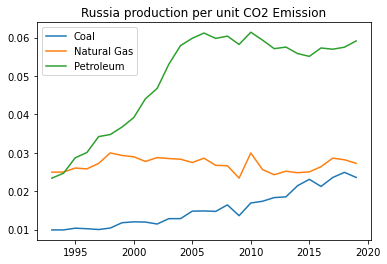

In [129]:

df0 = df.loc[df.Year >= 1993]
df1 = df0.loc[df.Country == 'Russia']
df2 = df1.loc[df1['Energy_type'] == 'natural_gas' ]
df3 = df1.loc[df1['Energy_type'] == 'coal' ]
df4 = df1.loc[df1['Energy_type'] == 'petroleum_n_other_liquids' ]

df5 = pd.concat([df4,df2,df3], ignore_index = True)
df5.drop(columns=['Energy_consumption', 'GDP', 'Population', 'Energy_intensity_per_capita', 'Energy_intensity_per_GDP'], inplace=True)
df5.insert(5, 'Production_per_CO2',(df5['Energy_production']/df5['CO2_emission']))
df5.drop(columns=['CO2_emission','Energy_production'],inplace=True)
df6 = df5.pivot_table(index = 'Year', values='Production_per_CO2',columns='Energy_type')
df6.reset_index(inplace=True)
df6
plt.plot(df6.Year,df6.coal, label = 'Coal')
plt.plot(df6.Year,df6.natural_gas, label = 'Natural Gas')
plt.plot(df6.Year,df6.petroleum_n_other_liquids, label = 'Petroleum')
plt.legend()
plt.title('Russia production per unit CO2 Emission')

This graph shows us that Russia has almost tripled its energy production per unit of CO2 emitted with petroleum, and more than doubled its energy production per unit of CO2 emitted with coal. This analysis demonstrates that improved effiency has reduced CO2 emissions in Russia.

Key takeaway #3: Individual countries have decreased CO2 consumptions in a variety of different ways: decreasing consumption, transitioning to renewable sources, and improving efficiency of polluting sources.

Lets transition into looking to see if GDP or population growth correlate to an increase in CO2 emissions.

In [134]:
df1 = df.loc[df['Energy_type'] == 'all_energy_types']
df1.corr(method = 'kendall')

<ipython-input-134-f9e0312a7939>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df1.corr(method = 'kendall')


,Year,Energy_consumption,Energy_production,GDP,Population,CO2_emission,Energy_intensity_per_capita,Energy_intensity_per_GDP
Year,1.000000,0.018649,0.017965,0.037909,0.002068,0.041589,0.032037,-0.046562
Energy_consumption,0.018649,1.000000,0.702673,0.816497,0.541836,0.894768,0.395832,0.350714
Energy_production,0.017965,0.702673,1.000000,0.663483,0.526495,0.649202,0.278441,0.282868
GDP,0.037909,0.816497,0.663483,1.000000,0.635889,0.778399,0.269138,0.167208
Population,0.002068,0.541836,0.526495,0.635889,1.000000,0.521175,-0.062334,0.005261
CO2_emission,0.041589,0.894768,0.649202,0.778399,0.521175,1.000000,0.373799,0.329581
Energy_intensity_per_capita,0.032037,0.395832,0.278441,0.269138,-0.062334,0.373799,1.000000,0.535278
Energy_intensity_per_GDP,-0.046562,0.350714,0.282868,0.167208,0.005261,0.329581,0.535278,1.000000


Here we can see that GDP and Population do have a correlation to CO2 emissions of .78 and .52 respectively suggesting that GDP is more strongly correlated to CO2 emission than population is.

Key takeaway #4: While GDP and Population are correlated to CO2 emissions, GDP is a stronger indicator of higher CO2 emissions.

The strongest correlation we see to CO2 emission is energy consumption and GDP which makes a lot of sense; the more energy a country consumes the higher it's CO2 emissions are, and wealthier countries also tend to have higher CO2 emissions.

c:\Users\Sam\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


[Text(0.5, 1.0, 'Energy Consumption VS CO2 emissions')]

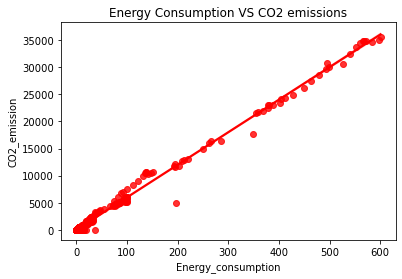

In [131]:
df1 = df.loc[df['Energy_type'] == 'all_energy_types']

sns.regplot(df1['Energy_consumption'],df1['CO2_emission'], color = 'red').set(title = 'Energy Consumption VS CO2 emissions')

[Text(0.5, 1.0, 'GDP VS CO2 emissions')]

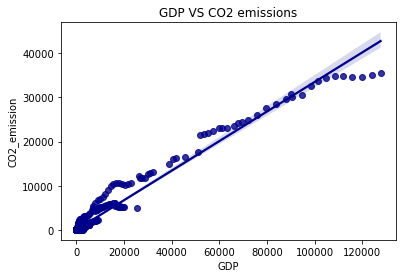

In [132]:
sns.regplot(df1['GDP'],df1['CO2_emission'], color = 'darkblue').set(title = 'GDP VS CO2 emissions')